In [2]:
!pip install bs4
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests # library to handle requests
from pandas import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [3]:
url = "https://en.wikipedia.org/wiki/Demographics_of_San_Diego_County,_California"

In [4]:
data  = requests.get(url).text
soup = BeautifulSoup(data,"html.parser")

In [5]:
tables = soup.find_all('table')

In [6]:
dataframe_list = pd.read_html(url, flavor='bs4')

In [7]:
len(dataframe_list)

5

In [8]:
pd.read_html(url, match="Population, race, and income", flavor='bs4')[0]

,"Population, race, and income","Population, race, and income.1","Population, race, and income.2","Population, race, and income.3","Population, race, and income.4","Population, race, and income.5"
0,Total population[6],3060849,3060849,NaN,NaN,NaN
1,White[6],2182604,71.3%,NaN,NaN,NaN
2,Hispanic or Latino (of any race)[7],967858,31.6%,NaN,NaN,NaN
3,Asian[6],333314,10.9%,NaN,NaN,NaN
4,Black or African American[6],154076,5.0%,NaN,NaN,NaN
5,American Indian or Alaska Native[6],20597,0.7%,NaN,NaN,NaN
6,Native Hawaiian or other Pacific Islander[6],14266,0.5%,NaN,NaN,NaN
7,Some other race[6],220000,7.2%,NaN,NaN,NaN
8,Two or more races[6],135992,4.4%,NaN,NaN,NaN
9,Per capita income[8],"$30,955","$30,955",NaN,NaN,NaN


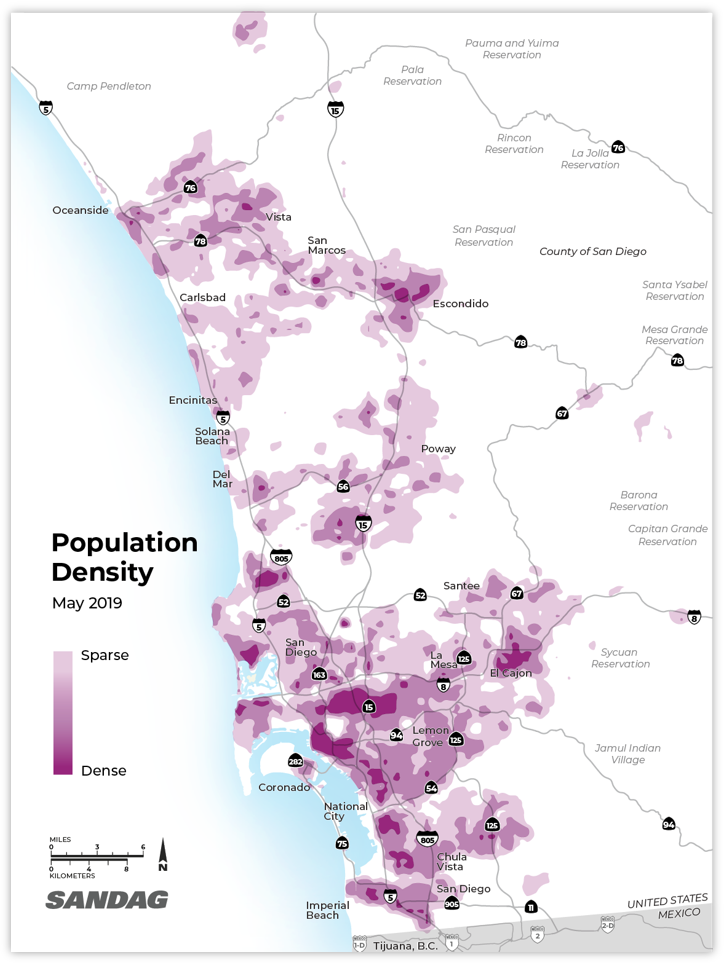

In [9]:
import urllib.request
from PIL import Image
  
urllib.request.urlretrieve(
  'https://raw.githubusercontent.com/DominicGalletta/Coursera_Capstone/main/populationdensity_may2019.png',
   "gfg.png")
  
img = Image.open("gfg.png")
img.show()

In [10]:
sandiego_data = pd.read_csv("https://raw.githubusercontent.com/DominicGalletta/Coursera_Capstone/main/SANDIEGOCOUNY.CSV")

In [11]:
sandiego_data.head()

,Neighborhood,Postal Code,Latitude,Longitude
0,Carlsbad,92008,33.158100,-117.350600
1,Chula_Vista,91910,32.639954,-117.106705
2,Coronado,91932,32.689110,-117.153748
3,Del_Mar,92041,32.959492,-117.265244
4,El_Cajon,92019,32.794773,-116.962524


In [12]:
headers = ["Neighborhood","Postal Code","Latitude","Longitude"]

In [13]:
sandiego_data.shape

(46, 4)

In [14]:
address = 'San Diego County, CA'

geolocator = Nominatim(user_agent="Coursera Application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Diego are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Diego are 32.9637838, -116.7706277.


In [15]:
# create map of New York using latitude and longitude values
map_sandiego = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood, postalcode in zip(sandiego_data['Latitude'], sandiego_data['Longitude'], sandiego_data['Neighborhood'], sandiego_data['Postal Code']):
    label = '{}, {}'.format(neighborhood, postalcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sandiego)  
    
map_sandiego

In [16]:
CLIENT_ID = 'JIN0YBEXHW1K1AGP1QZEETG44NK2E0ZCYVTZPSAEDPFKM4M4' # your Foursquare ID
CLIENT_SECRET = 'R2NBD33UATP4XBKZWWE03ACTLY3CVX5RTKSYC2MP0H1WIJWP' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JIN0YBEXHW1K1AGP1QZEETG44NK2E0ZCYVTZPSAEDPFKM4M4
CLIENT_SECRET:R2NBD33UATP4XBKZWWE03ACTLY3CVX5RTKSYC2MP0H1WIJWP


In [17]:
address = 'San Diego County, Ca'

geolocator = Nominatim(user_agent="Coursera Application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

32.9637838 -116.7706277


In [18]:
sandiego_data.loc[0, 'Neighborhood']

'Carlsbad'

In [19]:
neighborhood_latitude = sandiego_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = sandiego_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = sandiego_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Carlsbad are 33.1581, -117.3506.


In [20]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=JIN0YBEXHW1K1AGP1QZEETG44NK2E0ZCYVTZPSAEDPFKM4M4&client_secret=R2NBD33UATP4XBKZWWE03ACTLY3CVX5RTKSYC2MP0H1WIJWP&v=20180604&ll=33.1581,-117.3506&radius=500&limit=100'

In [21]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60fdbfba07b27071e3250d5b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Carlsbad',
  'headerFullLocation': 'Carlsbad',
  'headerLocationGranularity': 'city',
  'totalResults': 101,
  'suggestedBounds': {'ne': {'lat': 33.1626000045, 'lng': -117.34523474337983},
   'sw': {'lat': 33.153599995499995, 'lng': -117.35596525662017}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4adca881f964a5206a2e21e3',
       'name': 'Cafe Elysa',
       'location': {'address': '3076 Carlsbad Blvd',
        'lat': 33.15719002102637,
        'lng': -117.3504435314304,
        'labeledLatLngs': [{'label': 'display',
       

In [22]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Cafe Elysa,Bakery,33.157190,-117.350444
1,Gaia Gelato,Ice Cream Shop,33.159270,-117.350831
2,Naked Cafe,Breakfast Spot,33.159075,-117.350506
3,Choice Juicery,Juice Bar,33.159605,-117.348978
4,Park 101,Café,33.157881,-117.350468


In [24]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
# type your answer here
sandiego_venues = getNearbyVenues(names=sandiego_data['Neighborhood'],
                                   latitudes=sandiego_data['Latitude'],
                                   longitudes=sandiego_data['Longitude']
                                  )

Carlsbad
Chula_Vista
Coronado
Del_Mar
El_Cajon
Encinitas
Escondido
Imperial_Beach
La_Mesa
Lemon_Grove
National_City
Oceanside
Poway
San_Diego
San_Marcos
Santee
Solana
Vista
La_Presa
Fallbrook
Spring_Valley
Imperial_Bch
Ramona
Lakeside
Winter_Gdns
Alpine
Solana_Beach
Bonita
Camp_Pendleton S
Valley_Center
Harbison_Canyon
Potrero
Jacumba
Mount Laguna
La_Jolla
Pacific_Beach
Linda_Vista
Serra_Mesa
Kearny_Mesa
Grantville
Mission_Valley
Paradise_Hills
Skyline
Hillcrest
North_Park
City_Heights


In [27]:
print(sandiego_venues.shape)
sandiego_venues.head()

(1048, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Carlsbad,33.1581,-117.3506,Cafe Elysa,33.157190,-117.350444,Bakery
1,Carlsbad,33.1581,-117.3506,Gaia Gelato,33.159270,-117.350831,Ice Cream Shop
2,Carlsbad,33.1581,-117.3506,Naked Cafe,33.159075,-117.350506,Breakfast Spot
3,Carlsbad,33.1581,-117.3506,Choice Juicery,33.159605,-117.348978,Juice Bar
4,Carlsbad,33.1581,-117.3506,Park 101,33.157881,-117.350468,Café


In [28]:
sandiego_venues.groupby("Neighborhood").count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bonita,39,39,39,39,39,39
Carlsbad,100,100,100,100,100,100
Chula_Vista,3,3,3,3,3,3
City_Heights,8,8,8,8,8,8
Coronado,2,2,2,2,2,2
Del_Mar,41,41,41,41,41,41
El_Cajon,26,26,26,26,26,26
Encinitas,30,30,30,30,30,30
Escondido,33,33,33,33,33,33


In [29]:
print('There are {} uniques categories.'.format(len(sandiego_venues['Venue Category'].unique())))

There are 212 uniques categories.


In [30]:
# one hot encoding
sandiego_onehot = pd.get_dummies(sandiego_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sandiego_onehot['Neighborhood'] = sandiego_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sandiego_onehot.columns[-1]] + list(sandiego_onehot.columns[:-1])
sandiego_onehot = sandiego_onehot[fixed_columns]

sandiego_onehot.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Stop,Business Service,Café,Candy Store,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Discount Store,Dive Bar,Doctor's Office,Donut Shop,Dry Cleaner,Electronics Store,Empanada Restaurant,Escape Room,Eye Doctor,Fabric Shop,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fishing Store,Flower Shop,Fondue Restaurant,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,History Museum,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Inn,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Latin American Restaurant,Lawyer,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Pub,Ramen Restaurant,Record Shop,Recreation Center,Resort,Restaurant,Rock Club,Roller Rink,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Ski Lodge,Smoke Shop,Snack Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tailor Shop,Tanning Salon,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toll Booth,Tourist Information Center,Toy / Game Store,Train Station,Travel & Transport,Turkish Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Carlsbad,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Carlsbad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Carlsbad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [31]:
sandiego_onehot.shape

(1048, 213)

In [32]:
sandiego_grouped = sandiego_onehot.groupby('Neighborhood').mean().reset_index()
sandiego_grouped

,Neighborhood,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Stop,Business Service,Café,Candy Store,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Discount Store,Dive Bar,Doctor's Office,Donut Shop,Dry Cleaner,Electronics Store,Empanada Restaurant,Escape Room,Eye Doctor,Fabric Shop,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fishing Store,Flower Shop,Fondue Restaurant,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,History Museum,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Inn,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Latin American Restaurant,Lawyer,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Pub,Ramen Restaurant,Record Shop,Recreation Center,Resort,Restaurant,Rock Club,Roller Rink,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Ski Lodge,Smoke Shop,Snack Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tailor Shop,Tanning Salon,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toll Booth,Tourist Information Center,Toy / Game Store,Train Station,Travel & Transport,Turkish Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Bonita,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00000,0.0,0.000000,0.025641,0.00,0.025641,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.025641,0.00,0.000000,0.00,0.051282,0.00,0.000000,0.00,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.025641,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.025641,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.051282,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.025641,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.025641,0.00

In [33]:
sandiego_grouped.shape

(43, 213)

In [34]:
num_top_venues = 5

for hood in sandiego_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sandiego_grouped[sandiego_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bonita----
                venue  freq
0  Mexican Restaurant  0.10
1      Sandwich Place  0.05
2      Ice Cream Shop  0.05
3  Seafood Restaurant  0.05
4         Coffee Shop  0.05


----Carlsbad----
                 venue  freq
0   Mexican Restaurant  0.06
1   Italian Restaurant  0.06
2                Beach  0.06
3                  Bar  0.05
4  American Restaurant  0.05


----Chula_Vista----
             venue  freq
0              Zoo  0.33
1        Locksmith  0.33
2  Nature Preserve  0.33
3           Lawyer  0.00
4        Piano Bar  0.00


----City_Heights----
                venue  freq
0   Convenience Store  0.25
1  Mexican Restaurant  0.12
2       Grocery Store  0.12
3        Liquor Store  0.12
4         Video Store  0.12


----Coronado----
                     venue  freq
0            Boat or Ferry   0.5
1               Toll Booth   0.5
2                      ATM   0.0
3  New American Restaurant   0.0
4           Nightlife Spot   0.0


----Del_Mar----
                 venue  fr

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sandiego_grouped['Neighborhood']

for ind in np.arange(sandiego_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sandiego_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bonita,Mexican Restaurant,Sandwich Place,Ice Cream Shop,Coffee Shop,Seafood Restaurant,Boutique,Breakfast Spot,Sports Bar,Café,Chinese Restaurant
1,Carlsbad,Italian Restaurant,Mexican Restaurant,Beach,Bar,American Restaurant,Café,Hotel,Ice Cream Shop,Coffee Shop,Boutique
2,Chula_Vista,Zoo,Locksmith,Nature Preserve,Dry Cleaner,Electronics Store,Gastropub,Gas Station,Garden,Furniture / Home Store,Frozen Yogurt Shop
3,City_Heights,Convenience Store,Video Store,Grocery Store,Food Service,Liquor Store,Seafood Restaurant,Mexican Restaurant,Zoo,Fishing Store,Furniture / Home Store
4,Coronado,Boat or Ferry,Toll Booth,Zoo,Gay Bar,Gas Station,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant


In [37]:
# set number of clusters
kclusters = 5

sandiego_grouped_clustering = sandiego_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sandiego_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [38]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sandiego_merged = sandiego_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
sandiego_merged = sandiego_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sandiego_merged.head() # check the last columns!

,Neighborhood,Postal Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Carlsbad,92008,33.158100,-117.350600,0.0,Italian Restaurant,Mexican Restaurant,Beach,Bar,American Restaurant,Café,Hotel,Ice Cream Shop,Coffee Shop,Boutique
1,Chula_Vista,91910,32.639954,-117.106705,0.0,Zoo,Locksmith,Nature Preserve,Dry Cleaner,Electronics Store,Gastropub,Gas Station,Garden,Furniture / Home Store,Frozen Yogurt Shop
2,Coronado,91932,32.689110,-117.153748,0.0,Boat or Ferry,Toll Booth,Zoo,Gay Bar,Gas Station,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
3,Del_Mar,92041,32.959492,-117.265244,0.0,American Restaurant,Italian Restaurant,Mexican Restaurant,Seafood Restaurant,Hotel,Park,Sushi Restaurant,Sandwich Place,Sports Bar,Breakfast Spot
4,El_Cajon,92019,32.794773,-116.962524,0.0,Mexican Restaurant,Brewery,Motorcycle Shop,Bar,Chinese Restaurant,Motorsports Shop,Clothing Store,Coffee Shop,Middle Eastern Restaurant,Seafood Restaurant


In [39]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sandiego_merged['Latitude'], sandiego_merged['Longitude'], sandiego_merged['Neighborhood'], sandiego_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        
        fill=True,
       
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [40]:
sandiego_merged.loc[sandiego_merged['Cluster Labels'] == 0, sandiego_merged.columns[[1] + list(range(5, sandiego_merged.shape[1]))]]

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,92008,Italian Restaurant,Mexican Restaurant,Beach,Bar,American Restaurant,Café,Hotel,Ice Cream Shop,Coffee Shop,Boutique
1,91910,Zoo,Locksmith,Nature Preserve,Dry Cleaner,Electronics Store,Gastropub,Gas Station,Garden,Furniture / Home Store,Frozen Yogurt Shop
2,91932,Boat or Ferry,Toll Booth,Zoo,Gay Bar,Gas Station,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
3,92041,American Restaurant,Italian Restaurant,Mexican Restaurant,Seafood Restaurant,Hotel,Park,Sushi Restaurant,Sandwich Place,Sports Bar,Breakfast Spot
4,92019,Mexican Restaurant,Brewery,Motorcycle Shop,Bar,Chinese Restaurant,Motorsports Shop,Clothing Store,Coffee Shop,Middle Eastern Restaurant,Seafood Restaurant
5,92007,American Restaurant,Bar,Pizza Place,Bookstore,Coffee Shop,Vietnamese Restaurant,Ice Cream Shop,Gourmet Shop,New American Restaurant,Restaurant
6,92025,American Restaurant,Cosmetics Shop,Italian Restaurant,French Restaurant,Coffee Shop,ATM,Playground,Brewery,Burger Joint,Café
7,91932,Fast Food Restaurant,Bar,Shopping Plaza,Food Service,Grocery Store,Mexican Restaurant,Gas Station,Burger Joint,Nail Salon,Ice Cream Shop
8,91941,Coffee Shop,Mexican Restaurant,Sandwich Place,Cosmetics Shop,Frozen Yogurt Shop,Thrift / Vintage Store,Chinese Restaurant,Italian Restaurant,Pizza Place,Fast Food Restaurant
9,91945,Mexican Restaurant,Sandwich Place,Café,Discount Store,Fabric Shop,Clothing Store,Construction & Landscaping,Convenience Store,Deli / Bodega,Donut Shop


In [41]:
sandiego_merged.loc[sandiego_merged['Cluster Labels'] == 1, sandiego_merged.columns[[1] + list(range(5, sandiego_merged.shape[1]))]]

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,91902,Scenic Lookout,Zoo,Financial or Legal Service,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Service


In [42]:
sandiego_merged.loc[sandiego_merged['Cluster Labels'] == 2, sandiego_merged.columns[[1] + list(range(5, sandiego_merged.shape[1]))]]

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,91977,Seafood Restaurant,Home Service,Zoo,Financial or Legal Service,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck
37,92123,Home Service,Financial or Legal Service,Gas Station,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Service


In [43]:
sandiego_merged.loc[sandiego_merged['Cluster Labels'] == 3, sandiego_merged.columns[[1] + list(range(5, sandiego_merged.shape[1]))]]

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
42,92114,Park,Convenience Store,Zoo,Fishing Store,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck


In [44]:
sandiego_merged.loc[sandiego_merged['Cluster Labels'] == 4, sandiego_merged.columns[[1] + list(range(5, sandiego_merged.shape[1]))]]

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,91963,Post Office,Convenience Store,Zoo,Financial or Legal Service,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck
32,91934,Resort,Post Office,Convenience Store,BBQ Joint,Financial or Legal Service,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
